In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
house=pd.read_csv("HousingData.csv")

In [4]:
house

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90    NaN  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99    NaN  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

## Data preprocessing

In [5]:
house.head(3)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7

In [6]:
house.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
sns.heatmap(house.isnull())

<Axes: >

## Data filling having null values

In [8]:
house.fillna(house.mean(), inplace=True)

In [9]:
house.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Use Machine learning
## Divide the Data into training and testing


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = house.drop("MEDV", axis=1)
y = house['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33,random_state=3)

In [12]:
X

CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  2.5050    1  273   

     PTRATIO       B      LSTAT  
0       15.3  396.90   4.980000  
1       17.8  396.90   9.140000  
2       17.8  392.83   4.030000  
3       18.7  394.63   2.940000  
4       18.7  396.90  12.715432  
..       ...     ...        ...  
501     21.0  391.99  12.715432  
502     21.0  396.90   9.080000  
503     21.0  396.90   5.640000  
504     21.0  393.45   6.480000  
505     21.0  396.90   7.880000  

[506 rows x 13 columns]

## Linear regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [14]:
housedata=LinearRegression()

In [15]:
housedata.fit(X_train,y_train)

LinearRegression()

In [16]:
housedata.coef_,housedata.intercept_

(array([-1.33710837e-01,  3.02273341e-02, -1.04835355e-01,  4.44008254e+00,
        -1.06589096e+01,  4.11239130e+00, -9.92722470e-03, -1.17081881e+00,
         2.36980190e-01, -5.41437466e-03, -8.40423556e-01,  1.20972716e-02,
        -5.11584737e-01]),
 np.float64(26.424791802879568))

In [17]:
predict = housedata.predict(X_test)

In [36]:
predict,y_test

(array([38.33781817, 18.89856096, 24.19367235, 32.18733968, 24.73307017,
        23.36270261, 19.83220202,  5.83710296, 21.49556096, 17.73635209,
        11.64103319, 32.18323831, 35.78288064, 30.76322176,  6.68699274,
        11.21499056, 23.38549302, 14.52336911, 12.38772557, 29.09399285,
        27.33137142, 35.60976927, 26.82109887, 21.51124192, 13.66604077,
        25.65270847, 20.77576753, 17.97320983, 20.05362877, 24.17972568,
        14.98410085, 33.52777963, 21.86998682, 19.22710976, 17.40624706,
        23.47556651, 22.14637   , 32.90318322, 16.07477129, 22.64474027,
        17.13981279,  9.96156319, 25.23172651, 18.88308101, 25.75788904,
        26.20633354, 26.55273297, 17.87475928, 28.02480252, 20.77283908,
        20.90365136, 19.64988942, 38.23149309, 18.38626449, 25.2609901 ,
         9.3042586 , 36.13480499, 15.89808878, 31.35255754, 19.62675554,
        23.424132  , 22.98422193, 32.69956236, 32.64827366, 20.67967589,
        23.47995931, 33.96070165, 23.21041994, 28.6

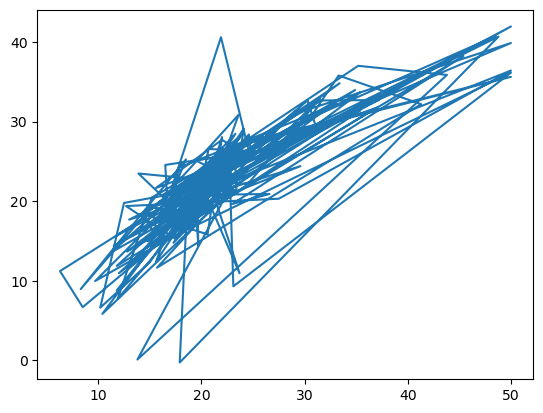

In [18]:
plt.plot(y_test,predict)

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score



In [21]:
#For linear regression
print("Mean absolute Error is:")
mean_absolute_error(y_test,predict)



Mean absolute Error is:


3.538641047569011

In [23]:
print("Mean squared Error is:")
mean_squared_error(y_test,predict)


Mean squared Error is:


23.918226819033027

In [24]:
print("R2 Error:")
r2_score(y_test,predict) 

R2 Error:


0.7059893725285492

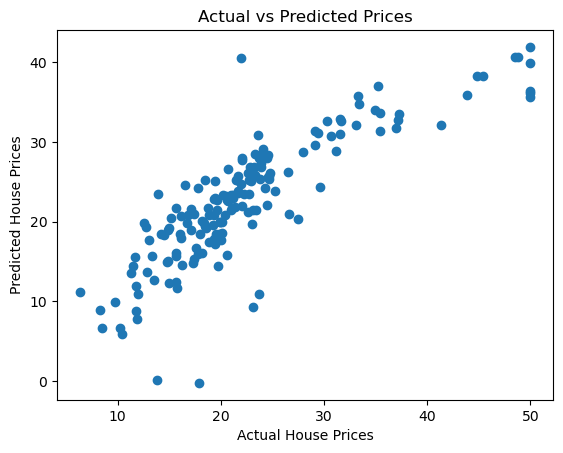

In [25]:
plt.scatter(y_test,predict)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


## predecting the MEDV

In [26]:
input_data = [
    0.02731,  
    0.0,      
    7.07,     
    0,        
    0.469,    
    6.421,    
    78.9,     
    4.9671,   
    2,        
    242,      
    17.8,     
    396.90,   
    9.14      
]
predicted = housedata.predict([input_data])
print(f"The predicted house price is: {predicted[0]}")


The predicted house price is: 24.817422995814276


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
